# Pandas Continuación

In [2]:
import pandas as pd
import numpy as np

In [3]:
datos=pd.read_csv("athlete_events.csv")
datos

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [4]:
data_medalleros=datos[["NOC","Year"]]

In [5]:
!pip install matplotlib

<AxesSubplot:>

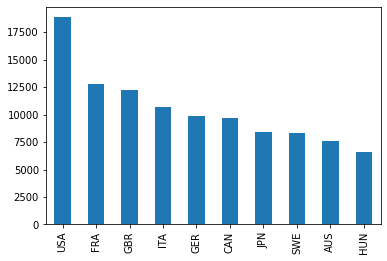

In [6]:
data_medalleros["NOC"].value_counts().head(10).plot(kind="bar")

In [7]:
Ejer_clase=datos[["Year","Season","Medal","NOC"]]

In [8]:
Ejer_clase.head()

,Year,Season,Medal,NOC
0,1992,Summer,NaN,CHN
1,2012,Summer,NaN,CHN
2,1920,Summer,NaN,DEN
3,1900,Summer,Gold,DEN
4,1988,Winter,NaN,NED


In [9]:
dummies=pd.get_dummies(Ejer_clase[["Medal"]])
dummies.head()

,Medal_Bronze,Medal_Gold,Medal_Silver
0,0,0,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0


In [10]:
concatenado=pd.concat([Ejer_clase,dummies],axis=1)
concatenado.head()

,Year,Season,Medal,NOC,Medal_Bronze,Medal_Gold,Medal_Silver
0,1992,Summer,NaN,CHN,0,0,0
1,2012,Summer,NaN,CHN,0,0,0
2,1920,Summer,NaN,DEN,0,0,0
3,1900,Summer,Gold,DEN,0,1,0
4,1988,Winter,NaN,NED,0,0,0


In [11]:
agrupado=concatenado.groupby(["Year","Medal","Season"]).sum()
agrupado.head(8)

Medal_Bronze  Medal_Gold  Medal_Silver
Year Medal  Season                                        
1896 Bronze Summer          38.0         0.0           0.0
     Gold   Summer           0.0        62.0           0.0
     Silver Summer           0.0         0.0          43.0
1900 Bronze Summer         175.0         0.0           0.0
     Gold   Summer           0.0       201.0           0.0
     Silver Summer           0.0         0.0         228.0
1904 Bronze Summer         150.0         0.0           0.0
     Gold   Summer           0.0       173.0           0.0

In [12]:
pearson=agrupado.corr()
pearson.style.background_gradient(cmap="coolwarm")

,Medal_Bronze,Medal_Gold,Medal_Silver
Medal_Bronze,1.000000,-0.258015,-0.257368
Medal_Gold,-0.258015,1.000000,-0.263463
Medal_Silver,-0.257368,-0.263463,1.000000


In [13]:
pearson.style.background_gradient(cmap="viridis")

,Medal_Bronze,Medal_Gold,Medal_Silver
Medal_Bronze,1.000000,-0.258015,-0.257368
Medal_Gold,-0.258015,1.000000,-0.263463
Medal_Silver,-0.257368,-0.263463,1.000000


In [14]:
agrupado["Total_Medals"]=agrupado["Medal_Gold"]+agrupado["Medal_Silver"]+agrupado["Medal_Bronze"]
agrupado.head(6)

Medal_Bronze  Medal_Gold  Medal_Silver  Total_Medals
Year Medal  Season                                                      
1896 Bronze Summer          38.0         0.0           0.0          38.0
     Gold   Summer           0.0        62.0           0.0          62.0
     Silver Summer           0.0         0.0          43.0          43.0
1900 Bronze Summer         175.0         0.0           0.0         175.0
     Gold   Summer           0.0       201.0           0.0         201.0
     Silver Summer           0.0         0.0         228.0         228.0

<AxesSubplot:xlabel='Year,Medal,Season'>

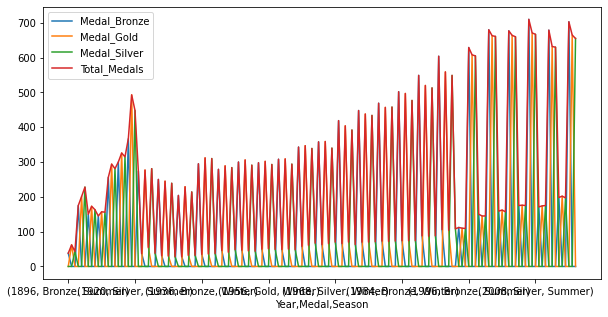

In [15]:
agrupado.plot(figsize=(10,5))

In [16]:
temporadas_4=agrupado[:12]
temporadas_4

Medal_Bronze  Medal_Gold  Medal_Silver  Total_Medals
Year Medal  Season                                                      
1896 Bronze Summer          38.0         0.0           0.0          38.0
     Gold   Summer           0.0        62.0           0.0          62.0
     Silver Summer           0.0         0.0          43.0          43.0
1900 Bronze Summer         175.0         0.0           0.0         175.0
     Gold   Summer           0.0       201.0           0.0         201.0
     Silver Summer           0.0         0.0         228.0         228.0
1904 Bronze Summer         150.0         0.0           0.0         150.0
     Gold   Summer           0.0       173.0           0.0         173.0
     Silver Summer           0.0         0.0         163.0         163.0
1906 Bronze Summer         145.0         0.0           0.0         145.0
     Gold   Summer           0.0       157.0           0.0         157.0
     Silver Summer           0.0         0.0         156.0         156.0

<AxesSubplot:xlabel='Year,Medal,Season'>

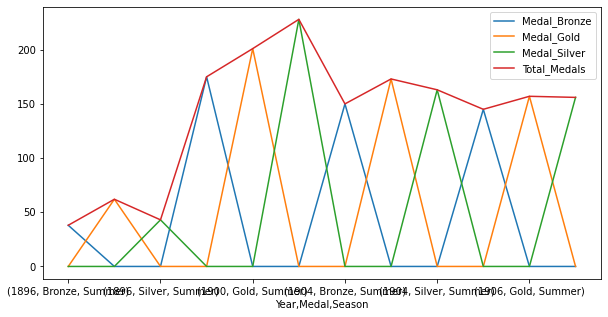

In [17]:
temporadas_4.plot(figsize=(10,5))

<AxesSubplot:xlabel='Year,Medal,Season'>

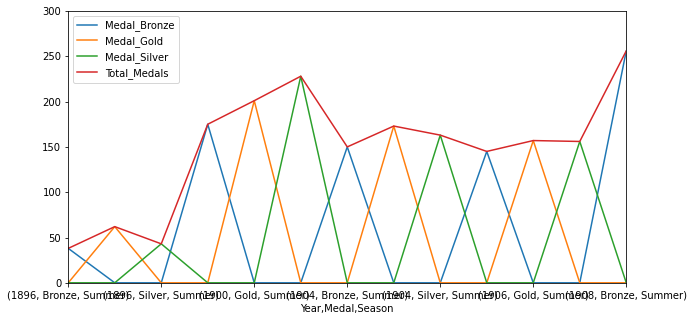

In [18]:
agrupado.plot(figsize=(10,5), xlim=(0,12), ylim=(0,300))

In [19]:
import matplotlib.pyplot as plt

In [20]:
def label(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

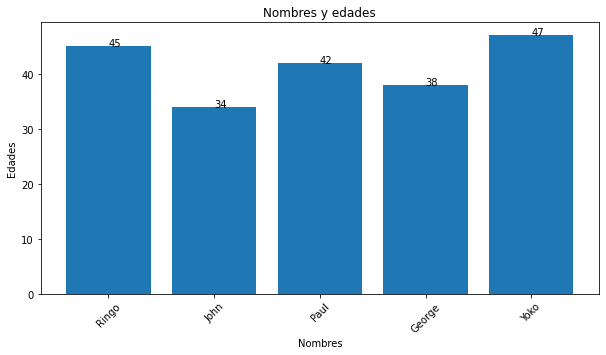

In [21]:
x=["Ringo","John","Paul","George","Yoko"]
y=[45,34,42,38,47]
plt.figure(figsize=(10,5))
plt.bar(x,y)
label(x,y) # Función definida arriba para especificar el label que lleva cada barra encima
plt.title("Nombres y edades")
plt.xlabel("Nombres")
plt.ylabel("Edades")
plt.xticks(rotation=45)
plt.show() # Muestra la gráfica

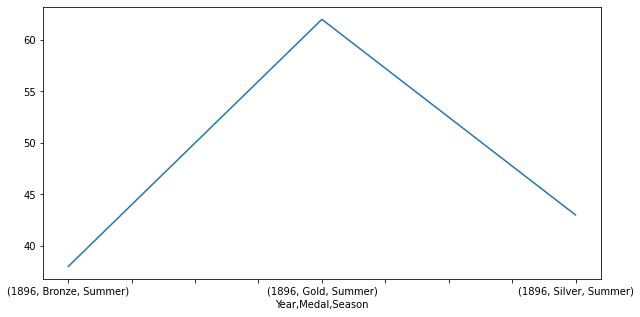

In [22]:
ax=agrupado[:3]["Total_Medals"].plot(figsize=(10,5))
fig=ax.get_figure()
fig.savefig("Gráfica de prueba")

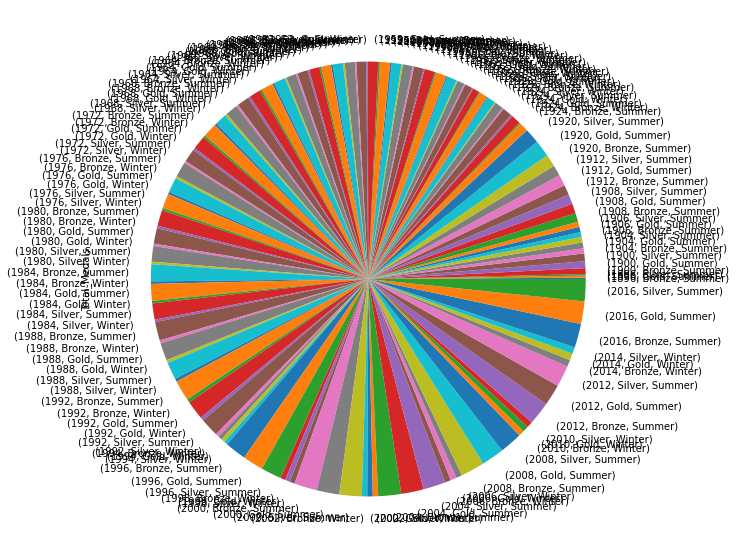

In [23]:
pie_plot=agrupado["Total_Medals"].plot.pie(figsize=(10,10))

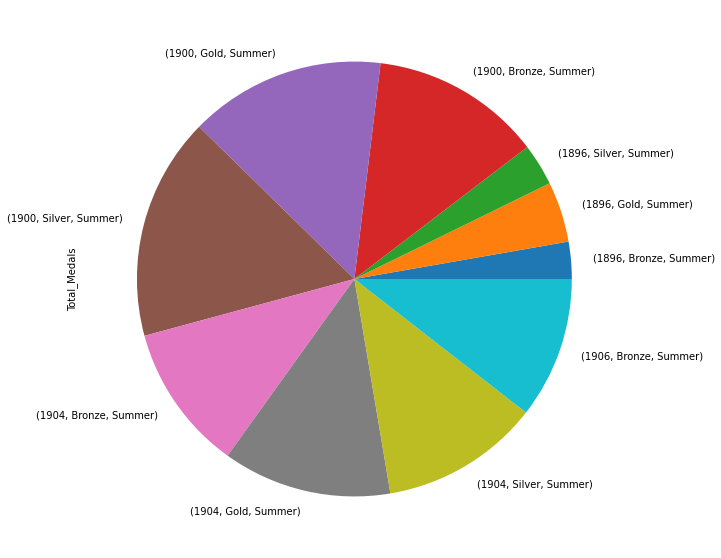

In [24]:
pie_plot=agrupado[:10]["Total_Medals"].plot.pie(figsize=(10,10))

In [25]:
cantidad=agrupado["Total_Medals"][:3].unique()
cantidad

array([38., 62., 43.])

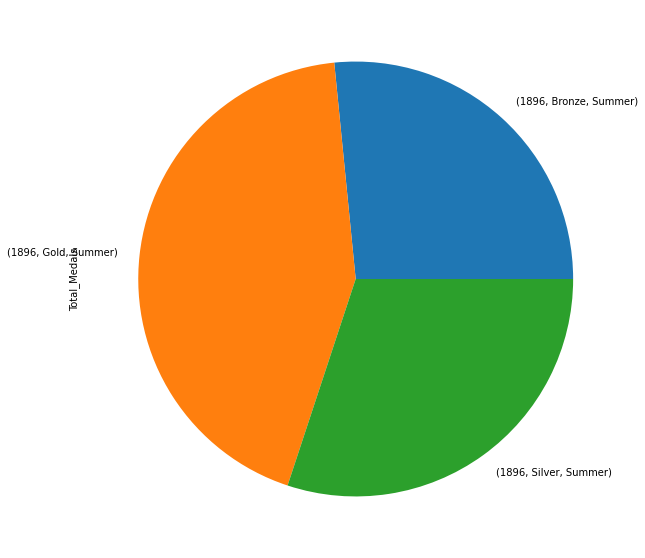

In [26]:
pie2=agrupado["Total_Medals"][:3].plot.pie(figsize=(10,10))

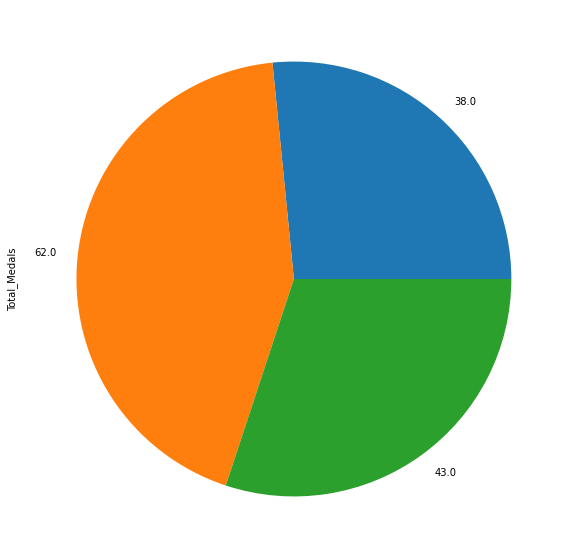

In [27]:
pie2=agrupado["Total_Medals"][:3].plot.pie(figsize=(10,10), labels=cantidad)

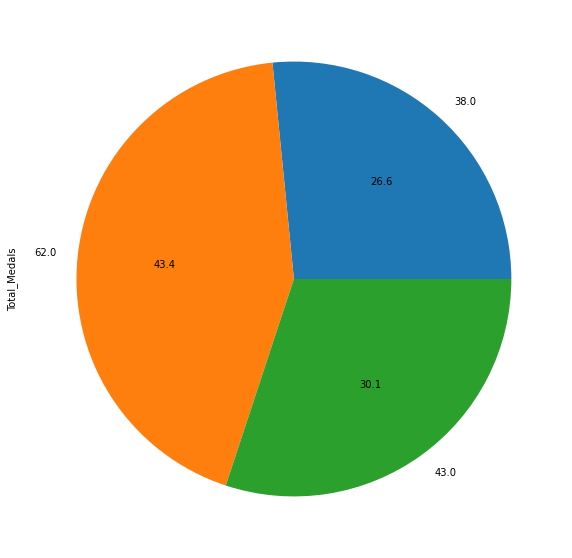

In [28]:
pie2=agrupado["Total_Medals"][:3].plot.pie(figsize=(10,10), labels=cantidad, autopct="%0.1f")

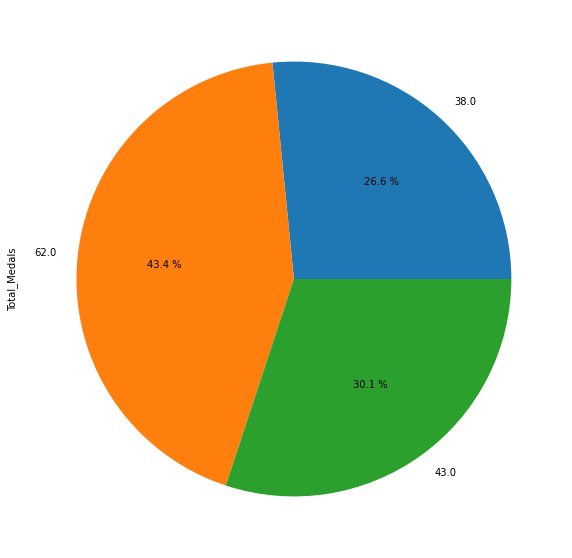

In [29]:
pie2=agrupado["Total_Medals"][:3].plot.pie(figsize=(10,10), labels=cantidad, autopct="%0.1f %%")

In [30]:
agrupado["Total_Medals"][:3]

Year  Medal   Season
1896  Bronze  Summer    38.0
      Gold    Summer    62.0
      Silver  Summer    43.0
Name: Total_Medals, dtype: float64

In [31]:
nombres=["Bronce","Oro","Plata"]

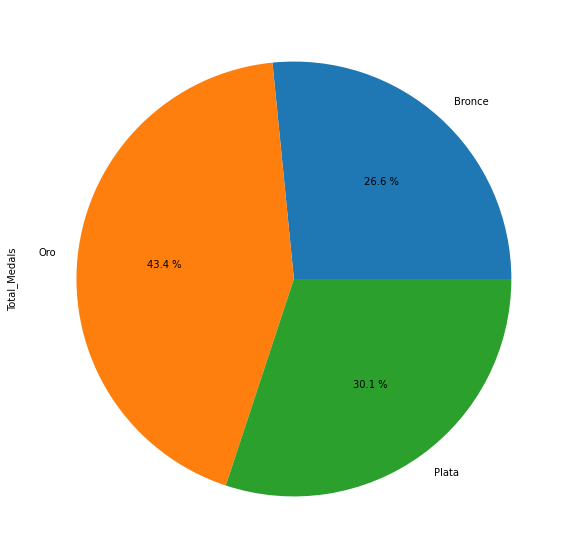

In [32]:
pie2=agrupado["Total_Medals"][:3].plot.pie(figsize=(10,10), labels=nombres, autopct="%0.1f %%")

# Ejercicio: Gráfica de Pay

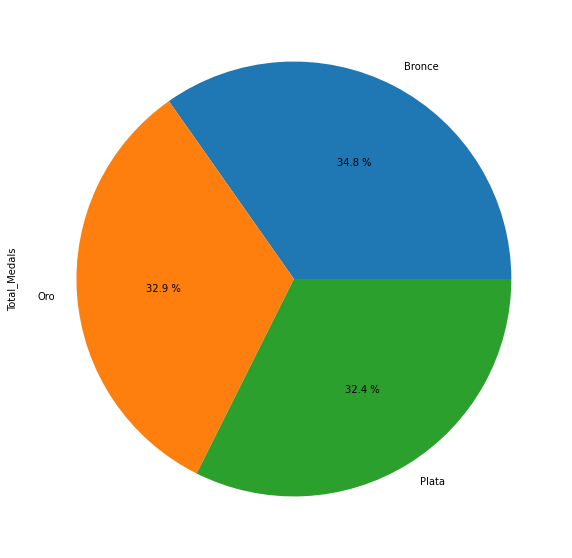

In [33]:
ultimoanio=agrupado[agrupado.shape[0]-3:]
pie3=ultimoanio["Total_Medals"][:3].plot.pie(figsize=(10,10), labels=nombres, autopct="%0.1f %%")
fig=pie3.get_figure()
fig.savefig("Gráfica de Pay.jpg")

# Actividad Gráfica de Medallas (Básica)

<AxesSubplot:xlabel='Team'>

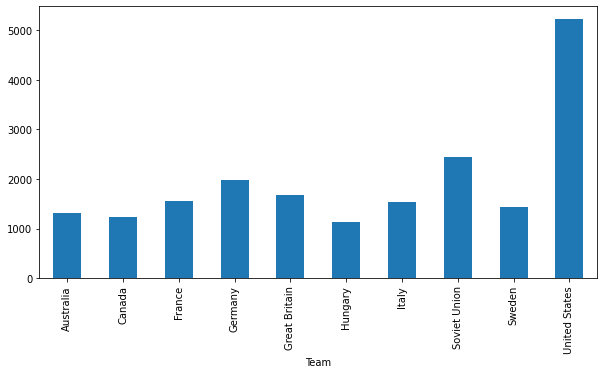

In [64]:
base=datos[["Team","Medal"]]
dummies=pd.get_dummies(base[["Medal"]])
conca=pd.concat([base,dummies],axis=1)
agrupa=conca.groupby(["Team"]).sum()
agrupa["Total_Medals"]=agrupa["Medal_Gold"]+agrupa["Medal_Silver"]+agrupa["Medal_Bronze"]
top10=agrupa.sort_values(by=["Total_Medals"],ascending=False).head(10)
top10=top10.sort_values(by=["Team"])
top10["Total_Medals"].plot.bar(figsize=(10,5))

# Actividad Gráfica de Medallas (Avanzada)

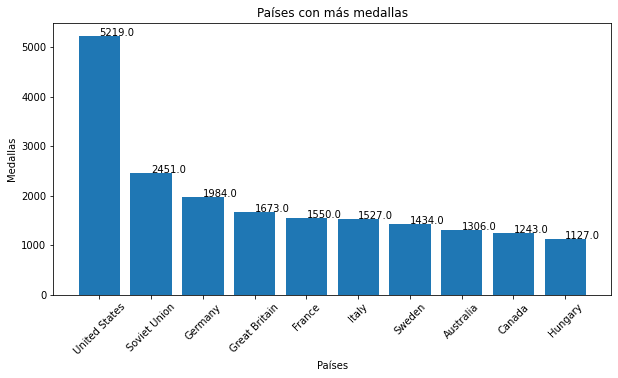

In [80]:
top10=top10.sort_values(by=["Total_Medals"],ascending=False)
x=top10.index
y=top10["Total_Medals"]
plt.figure(figsize=(10,5))
plt.bar(x,y)
label(x,y) # Función definida arriba para especificar el label que lleva cada barra encima
plt.title("Países con más medallas")
plt.xlabel("Países")
plt.ylabel("Medallas")
plt.xticks(rotation=45)
plt.show() # Muestra la gráfica